<a href="https://colab.research.google.com/github/Sanket758/Machine-Learning-Projects/blob/master/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip '/content/drive/My Drive/P96-Section-2-Emotion-AI.zip'
!unzip Emotion+AI+Dataset.zip 

Archive:  /content/drive/My Drive/P96-Section-2-Emotion-AI.zip
replace Emotion+AI+Dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  Emotion+AI+Dataset.zip
replace Emotion AI Dataset/augmented.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Importing necessary libraries

In [6]:
import os
import PIL
import pandas as pd
import numpy as np
    
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [88]:
# Load facial key points dataset
facial_key_points = pd.read_csv('/content/Emotion AI Dataset/data.csv')

In [89]:
facial_key_points.shape

(2140, 31)

In [90]:
facial_key_points.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [91]:
facial_key_points.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [92]:
facial_key_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [93]:
    facial_key_points['Image'][0] # Looking at the first image

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [94]:
facial_key_points['Image'] = facial_key_points['Image'].apply(lambda x: np.fromstring(x,dtype='int',sep=' ').reshape(96,96))

In [95]:
facial_key_points['Image'][0].shape 

(96, 96)

# Image Visualization

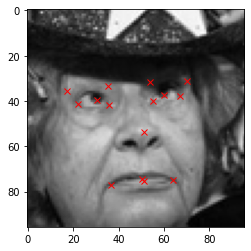

In [96]:
i = np.random.randint(1, len(facial_key_points))
plt.imshow(facial_key_points['Image'][i], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(facial_key_points.loc[i][j-1], facial_key_points.loc[i][j], 'rx')

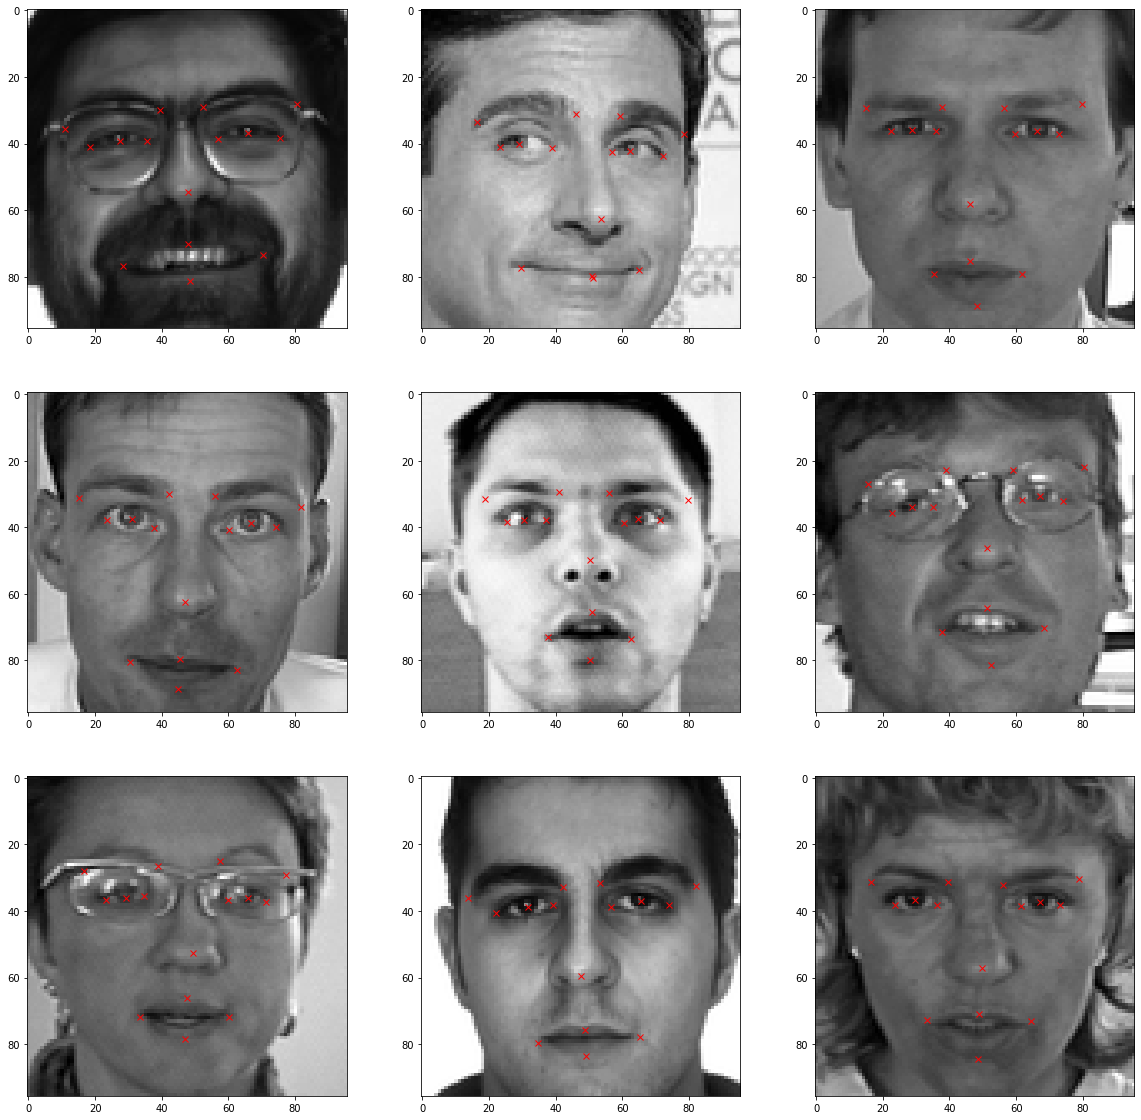

In [97]:
fig = plt.figure(figsize=(20,20))

for k in range(9):
    i = np.random.randint(1, len(facial_key_points))
    ax = fig.add_subplot(3,3,k+1)
    plt.imshow(facial_key_points['Image'][i],cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(facial_key_points.loc[i][j-1], facial_key_points.loc[i][j], 'rx')

# Perform Image Augmentation

In [98]:
facial_key_points_copy = facial_key_points.copy(deep=True)

In [99]:
columns = facial_key_points_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [100]:
facial_key_points_copy['Image'] = facial_key_points_copy['Image'].apply(lambda x: np.flip(x, axis=1))

for i in range(len(columns)):
    if i%2 == 0:
        facial_key_points_copy[columns[i]] = facial_key_points_copy[columns[i]].apply(lambda x: 96. - float(x))

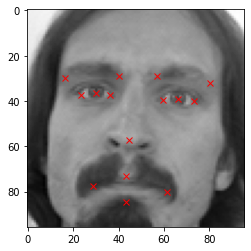

In [101]:
# Show original image
plt.imshow(facial_key_points['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(facial_key_points.loc[0][j-1], facial_key_points.loc[0][j],'rx')

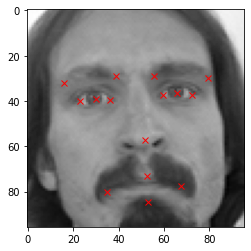

In [102]:
# Show Augmented image
plt.imshow(facial_key_points_copy['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(facial_key_points_copy.loc[0][j-1], facial_key_points_copy.loc[0][j],'rx')

In [103]:
augmented_data = np.concatenate([facial_key_points, facial_key_points_copy])

In [104]:
augmented_data.shape

(4280, 31)

In [105]:
# Augmenting brightness
import random

facial_key_points_copy = facial_key_points.copy(deep=True)

columns = facial_key_points_copy.columns[:-1]

facial_key_points_copy['Image'] = facial_key_points_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2)*x, 0., 255.))

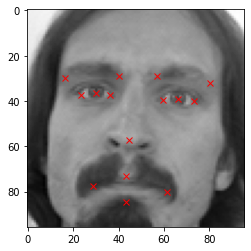

In [106]:
# Show original image
plt.imshow(facial_key_points['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(facial_key_points.loc[0][j-1], facial_key_points.loc[0][j],'rx')

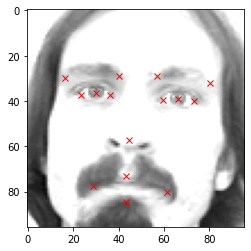

In [107]:
# Show Augmented image
plt.imshow(facial_key_points_copy['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(facial_key_points_copy.loc[0][j-1], facial_key_points_copy.loc[0][j],'rx')

In [108]:
augmented_data = np.concatenate([augmented_data, facial_key_points_copy])
augmented_data.shape

(6420, 31)

# Image Normalization and training data preparation

In [109]:
img = augmented_data[:,30]

img = img/255

X = np.empty((len(img), 96, 96 ,1))

for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis=2)

X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [110]:
y = augmented_data[:, :30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [112]:
X_train.shape, y_train.shape

((5136, 96, 96, 1), (5136, 30))

In [113]:

X_test.shape, y_test.shape

((1284, 96, 96, 1), (1284, 30))

# Creating a Model

In [114]:
# Defining Res Block
def res_block(X, filter, stage):
    
    #Conv Block
    X_copy = X
    f1, f2, f3 = filter

    # Main Path
    X = Conv2D(f1,kernel_size=(1,1), name='res_'+str(stage)+'_conv_a', 
               kernel_initializer=glorot_uniform(seed=0))(X)

    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3),padding='same', 
               name='res_'+str(stage)+'_conv_b', 
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1), name='res_'+str(stage)+'_conv_c', 
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_conv_c')(X)

    # Short Path
    X_copy= Conv2D(f3, (1,1), name='res_'+str(stage)+'_conv_copy',
                   kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis=3, 
                                name='batch_norm_'+str(stage)+'_conv_copy')(X_copy)

    # Add
    X = Add()([X, X_copy])
    X = Activation('relu')(X)


    # Identity Block 1
    X_copy = X

    # Main Path
    X = Conv2D(f1, kernel_size=(1,1), name='res_'+str(stage)+'_identity_1_a', 
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3), padding='same',
               name='res_'+str(stage)+'_identity_1_b',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1),
               name='res_'+str(stage)+'_identity_1_c',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_1_c')(X)

    # Add 
    X = Add()([X, X_copy])
    X = Activation('relu')(X)


    # Identity Block 2
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1,1), name='res_'+str(stage)+'_identity_2_a',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3), padding='same',
               name='res_'+str(stage)+'_identity_2_b', 
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1),
               name='res_'+str(stage)+'_identity_2_c', 
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='batch_norm_'+str(stage)+'_identity_2_c')(X)

    # Add 
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

In [144]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (5,5), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)

X = Conv2D(64, (3,3), strides= (2,2), name = 'conv2', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv2')(X)
X = Activation('relu')(X)


X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)

#4 - stage
# X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(1024, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(512, activation = 'relu')(X)
# X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 102, 102, 1)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 49, 49, 64)   1664        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 49, 49, 64)   256         conv1[0][0]                      
______________________________________________________________________________________

# Compile and fit the model

In [145]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model_1_facialKeyPoints.compile(loss='mse',optimizer=adam,metrics=['accuracy'])

In [146]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=15)
checkpoint = ModelCheckpoint(filepath='FacialKeyPoints_weights.hdf5', verbose=1,save_best_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, verbose=1, min_lr=0.0000001)

In [147]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.02, callbacks=[checkpoint,early_stop, lr_reduce])

Epoch 1/50
158/158 [==============================] - ETA: 0s - loss: 262.4121 - accuracy: 0.6398
Epoch 00001: val_loss improved from inf to 815.21753, saving model to FacialKeyPoints_weights.hdf5
158/158 [==============================] - 4s 23ms/step - loss: 262.4121 - accuracy: 0.6398 - val_loss: 815.2175 - val_accuracy: 0.6311
Epoch 2/50
157/158 [============================>.] - ETA: 0s - loss: 159.0606 - accuracy: 0.6732
Epoch 00002: val_loss improved from 815.21753 to 305.66293, saving model to FacialKeyPoints_weights.hdf5
158/158 [==============================] - 3s 19ms/step - loss: 159.1188 - accuracy: 0.6730 - val_loss: 305.6629 - val_accuracy: 0.6311
Epoch 3/50
157/158 [============================>.] - ETA: 0s - loss: 142.1915 - accuracy: 0.6692
Epoch 00003: val_loss improved from 305.66293 to 188.82896, saving model to FacialKeyPoints_weights.hdf5
158/158 [==============================] - 3s 19ms/step - loss: 142.2509 - accuracy: 0.6688 - val_loss: 188.8290 - val_accura

In [148]:
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints_Model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk


In [149]:
with open('FacialKeyPoints_Model.json', 'r') as json_file:
    json_SavedModel = json_file.read()

# Load the model architecture
new_model = tf.keras.models.model_from_json(json_SavedModel)
new_model.load_weights('/content/FacialKeyPoints_weights.hdf5')


In [150]:
new_model.compile(loss='mse',optimizer=adam,metrics=['accuracy'])

In [151]:
result = new_model.evaluate(X_test, y_test)
print(f'Accuracy:{result[1]}')

41/41 [==============================] - 0s 6ms/step - loss: 66.3326 - accuracy: 0.6589
Accuracy:0.65887850522995


In [46]:
#tf.saved_model.save(model_1_facialKeyPoints, '/content/Saved models/Facial_key_Model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/Saved models/Facial_key_Model/assets


# Visualizing the training epochs

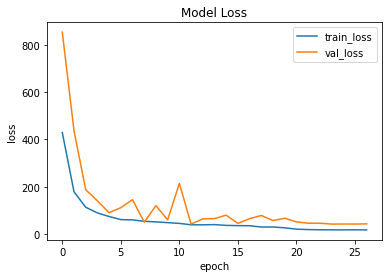

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

# Part 2 Facial Expression Recognitionn

In [48]:
# Importing the dataset
FER = pd.read_csv('/content/Emotion AI Dataset/icml_face_data.csv')
FER.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [49]:
FER.columns = ['emotion', 'pixels']

In [50]:
type(FER.pixels[0])

str

In [51]:
def str_to_array(x):
    return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

def resize_img(x):
    img = x.reshape(48,48) 
    return cv2.resize(img, dsize=(96,96), interpolation=cv2.INTER_CUBIC)

In [52]:
FER.pixels = FER.pixels.apply(lambda x: str_to_array(x))
FER.pixels = FER.pixels.apply(lambda x: resize_img(x))

In [53]:
FER.isna().sum()

emotion    0
pixels     0
dtype: int64

In [54]:
label_to_txt = {0:'anger',1:'disgust',2:'sad', 3:'happiness', 4:'surprise'}

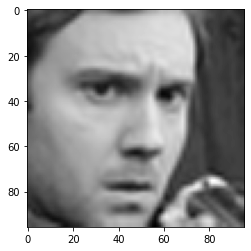

In [55]:
plt.imshow(FER.pixels[0], cmap='gray');

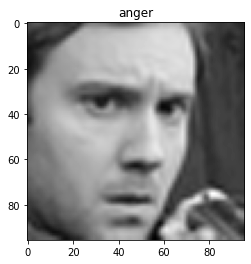

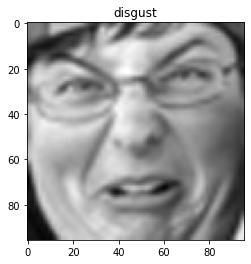

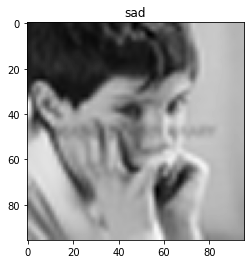

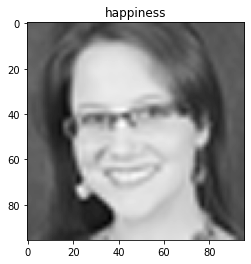

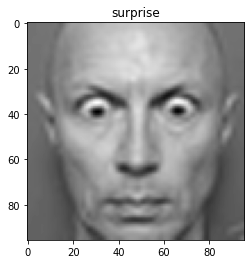

In [56]:
emotions = [0,1,2,3,4]
for i in emotions:
    data = FER[FER['emotion']==i][:1]
    img = data.pixels.item()
    img = img.reshape(96,96)
    plt.figure()
    plt.title(label_to_txt[i])
    plt.imshow(img, cmap='gray')

In [57]:
FER.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

In [58]:
FER.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


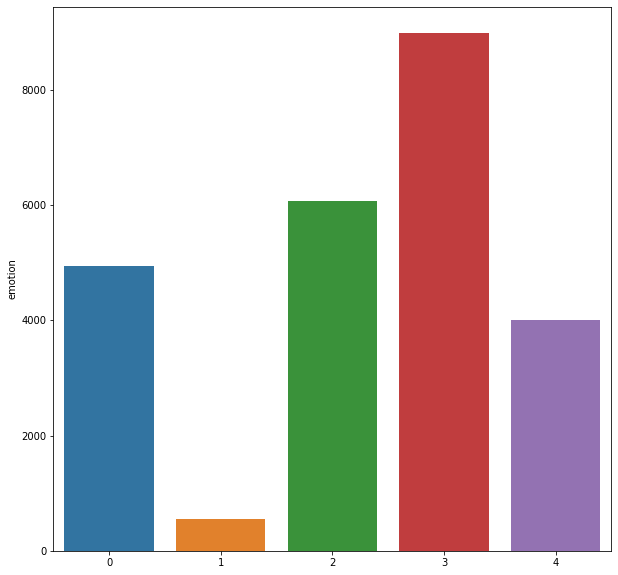

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(FER.emotion.value_counts().index, FER.emotion.value_counts());

#Image Augmentation and Data Preparation

In [60]:
from keras.utils import to_categorical
X = FER.pixels
X = FER.pixels
y = to_categorical(FER.emotion)
X.shape, y.shape

((24568,), (24568, 5))

In [61]:
X[0].shape #first image

(96, 96)

In [62]:
X = np.stack(X, axis=0)
X = X.reshape(24568, 96,96,1)
print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(22111, 96, 96, 1) (22111, 5)
(1229, 96, 96, 1) (1229, 5)
(1228, 96, 96, 1) (1228, 5)


In [65]:
X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [66]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [67]:
input_shape = (96,96,1)

X_input = Input(input_shape)

X = ZeroPadding2D((3,3))(X_input)

# Stage 1
X = Conv2D(64, (7,7), strides=(2,2), name='conv_1')(X)
X = BatchNormalization(axis=3, name='batch_norm1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# Stage 2
X = res_block(X, filter=[64,64,256], stage=2)
#Stage 3
X = res_block(X, filter=[128,128,512], stage=3)
#Stage 4
X = res_block(X, filter=[256,256,1024], stage=4)

X = AveragePooling2D((2,2), name='Avg_pool')(X)

X = Flatten()(X)
X = Dense(128, activation='relu', name='Dense1')(X)
X = Dense(5, activation='softmax', name='Dense_Final')(X)

model_2_emotion = Model(inputs=X_input, outputs=X, name='Resnet18')
model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_norm1 (BatchNormalization (None, 48, 48, 64)   256         conv_1[0][0]                     
___________________________________________________________________________________________

In [68]:
model_2_emotion.compile(optimizer='Adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [69]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1,mode='min', patience=5)
checkpoint = ModelCheckpoint(filepath='FacialExpression_weights.hdf5', verbose=1,save_best_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, verbose=1, min_lr=0.0000001)

In [70]:
history2 = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=128),
                               validation_data=(X_val, y_val),
                               steps_per_epoch=len(X_train)//128,
                               epochs=50,
                               callbacks=[early_stop, lr_reduce, checkpoint]
                               )

Epoch 1/50
172/172 [==============================] - ETA: 0s - loss: 1.5126 - accuracy: 0.3971
Epoch 00001: val_loss improved from inf to 1.44353, saving model to FacialExpression_weights.hdf5
172/172 [==============================] - 26s 149ms/step - loss: 1.5126 - accuracy: 0.3971 - val_loss: 1.4435 - val_accuracy: 0.3754
Epoch 2/50
172/172 [==============================] - ETA: 0s - loss: 1.1869 - accuracy: 0.5084
Epoch 00002: val_loss did not improve from 1.44353
172/172 [==============================] - 24s 141ms/step - loss: 1.1869 - accuracy: 0.5084 - val_loss: 1.5139 - val_accuracy: 0.2541
Epoch 3/50
172/172 [==============================] - ETA: 0s - loss: 1.0283 - accuracy: 0.5816
Epoch 00003: val_loss improved from 1.44353 to 1.09868, saving model to FacialExpression_weights.hdf5
172/172 [==============================] - 25s 144ms/step - loss: 1.0283 - accuracy: 0.5816 - val_loss: 1.0987 - val_accuracy: 0.5350
Epoch 4/50
172/172 [==============================] - ETA: 

In [71]:
model_json = model_2_emotion.to_json()
with open('FacialExpression_model.json','w') as json_file:
    json_file.write(model_json)

In [72]:
with open('FacialExpression_model.json', 'r') as json_file:
    json_SavedModel = json_file.read()

FER_model = tf.keras.models.model_from_json(json_SavedModel)
FER_model.load_weights('FacialExpression_weights.hdf5')
FER_model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
score = FER_model.evaluate(X_test, y_test)
print(f'Accuracy: {score[1]}')

39/39 [==============================] - 0s 10ms/step - loss: 0.5922 - accuracy: 0.7762
Accuracy: 0.7762408256530762


In [74]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs= range(len(accuracy))

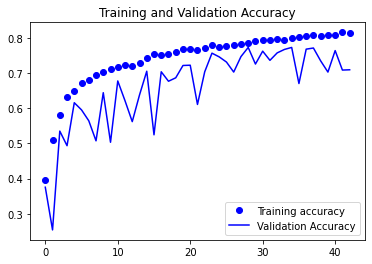

In [75]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

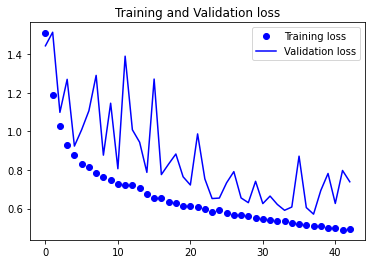

In [76]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [77]:
predicted_classes = np.argmax(FER_model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

In [78]:
y_true.shape

(1229,)

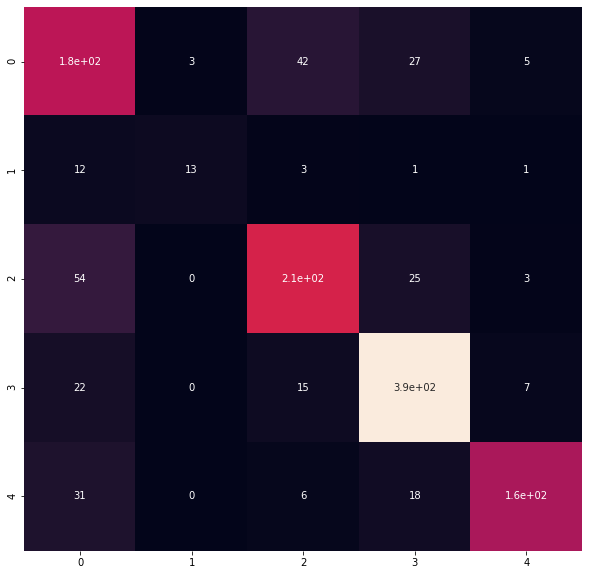

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cbar=False);

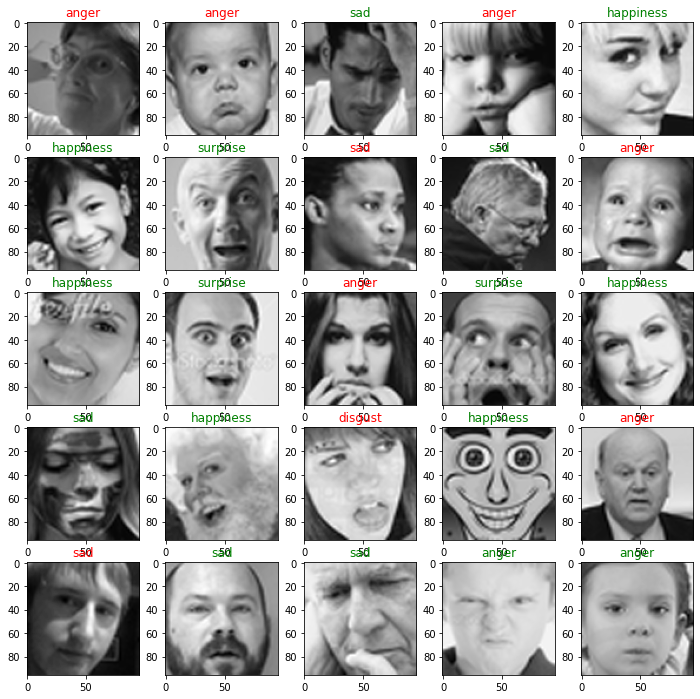

In [80]:
fig = plt.figure(figsize=(12,12))

for k in range(25):
    i = np.random.randint(1, len(y_test))
    ax = fig.add_subplot(5,5,k+1)
    plt.imshow(X_test[i].reshape(96,96),cmap='gray')
    if predicted_classes[i] == np.argmax(y_test[i]):
        plt.title(label_to_txt[predicted_classes[i]],fontdict={'color':'green'})
    else:
        plt.title(label_to_txt[predicted_classes[i]],fontdict={'color':'red'})

In [81]:
from sklearn.metrics import precision_score, recall_score,classification_report
print('Report:\n',classification_report(predicted_classes, y_true))
print('Precision:', precision_score(predicted_classes, y_true,average='weighted'))
print('Recall: ', recall_score(predicted_classes, y_true,average='weighted'))

Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       299
           1       0.43      0.81      0.57        16
           2       0.72      0.76      0.74       273
           3       0.90      0.85      0.87       461
           4       0.75      0.91      0.82       180

    accuracy                           0.78      1229
   macro avg       0.70      0.79      0.73      1229
weighted avg       0.78      0.78      0.78      1229

Precision: 0.7818931338424191
Recall:  0.7762408462164361


In [82]:
# tf.saved_model.save(model_2_emotion, '/content/Saved models/Emotion_Model/')

# Part 3 Combine both the models
1. Facial Key points Model
2. Facial Expression Model

In [152]:
def predict(X_test):
    df_predict = model_1_facialKeyPoints.predict(X_test)

    df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

    df_emotion = np.expand_dims(df_emotion, axis=1)

    df_pred = pd.DataFrame(df_predict, columns=columns)

    df_pred['emotion'] = df_emotion

    return df_pred    

In [153]:
df_predict = predict(X_test)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,65.298523,36.288376,27.316509,35.943913,57.710815,36.904045,73.094177,36.860783,35.294548,36.220261,19.980597,36.640652,54.279736,27.500526,80.206215,29.580626,38.512188,27.763168,12.304824,29.234436,46.396057,56.316685,62.306961,76.228828,30.255173,75.108986,46.093262,71.210289,46.640804,83.325577,2
1,29.394184,35.956692,65.455292,36.070061,36.233921,36.955605,22.100998,36.671734,58.522793,37.009087,72.518440,37.196384,39.389149,28.417347,15.933781,29.129168,55.988842,28.468691,79.007767,29.673250,47.378845,56.015385,31.932564,74.317833,61.880394,74.260132,47.091335,71.070297,47.033508,80.814003,2
2,63.835339,35.479454,29.619741,35.967693,57.486691,36.909317,70.387177,36.126862,35.900112,36.830124,22.922085,36.828987,54.333168,28.666401,76.027222,28.597681,38.549103,29.176594,16.496431,29.415951,47.297539,55.866947,61.664268,73.256844,32.826275,73.321709,47.154873,70.469666,47.328602,78.748474,4
3,29.353674,35.774773,64.680687,35.936897,36.134197,36.721062,22.230907,36.426037,57.970058,36.777508,71.740845,36.970215,39.156700,28.424929,16.273508,28.972898,55.519825,28.463606,77.956833,29.499418,46.992607,55.744137,31.875225,73.762428,61.218853,73.842354,46.722012,70.797180,46.646179,80.010284,2
4,29.891132,36.440716,65.936012,36.605019,36.792278,37.404617,22.614834,37.105171,59.077774,37.460907,73.112183,37.655224,39.880501,28.934202,16.543055,29.518530,56.573147,28.972511,79.466187,30.047735,47.882267,56.789036,32.458683,75.156296,62.388008,75.225861,47.599472,72.104202,47.526875,81.540161,0


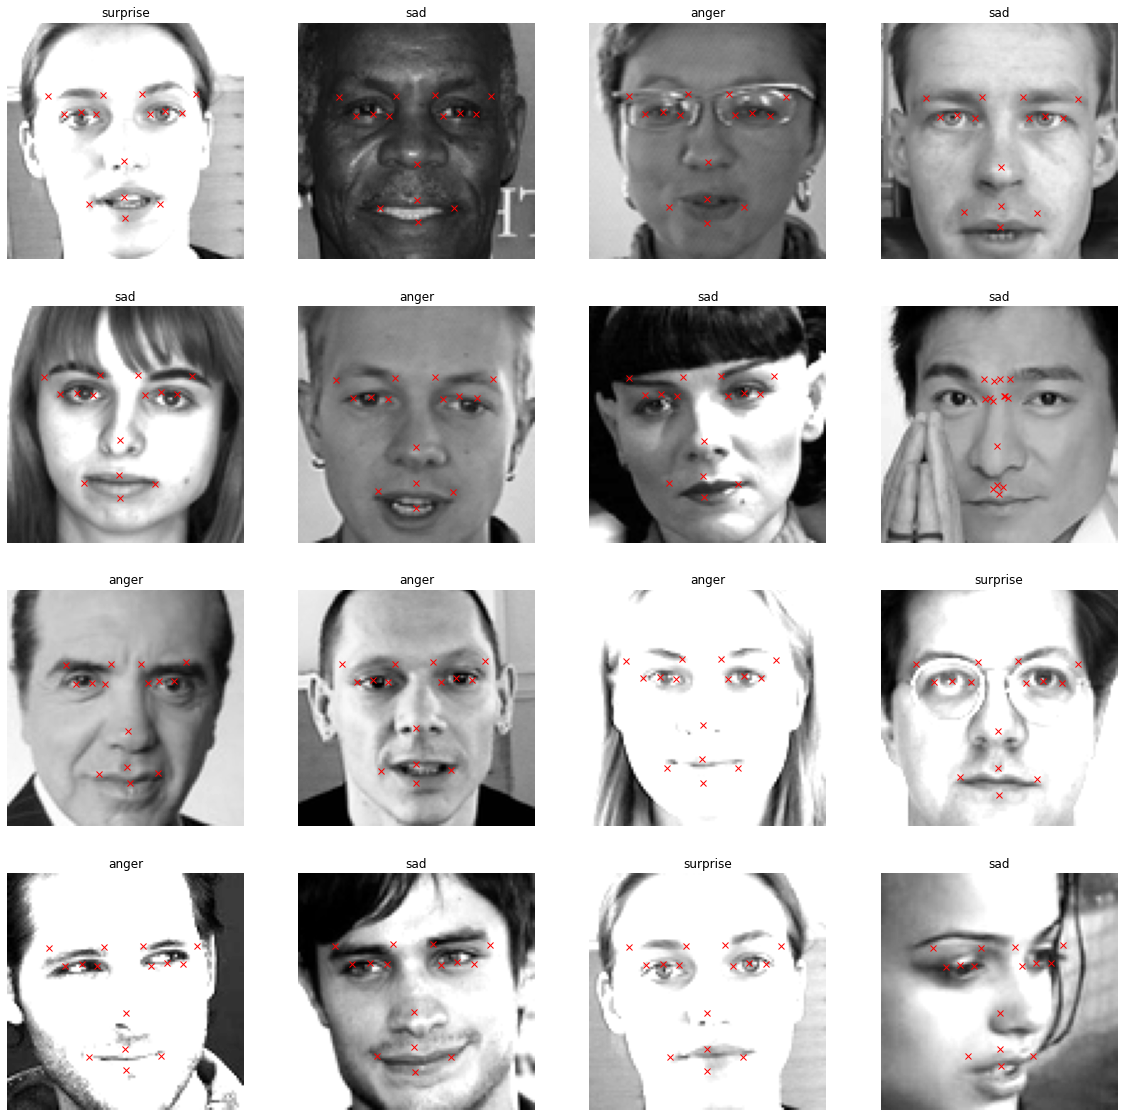

In [154]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
axes = axes.ravel()

for k in range(16):
    i = np.random.randint(1, len(X_test))
    axes[k].imshow(X_test[i].squeeze(), cmap='gray')
    axes[k].set_title(label_to_txt[df_predict['emotion'][i]])
    axes[k].axis('off')
    for j in range(1, 31, 2):
        axes[k].plot(df_predict.loc[i][j-1],df_predict.loc[i][j], 'rx')